# Visualizing States

## Initial setup

In [1]:
from vizdoom import *
import sys
sys.path.insert(0, "../python")
from helper import create_network, create_agent
import tensorflow as tf
import numpy as np
import math
from time import time
import copy
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

## Create game

In [37]:
tf.reset_default_graph()

agent_file = "../agents/ddqn.json"
config_file = "../config/open_field.cfg"
results_dir = "../experiments/tools/screens/open_field_map03/"
action_set = "basic_three"

game = DoomGame()
game.load_config(config_file)
game.init()

agent = create_agent(agent_file,
                     game=game, 
                     params_file=None,
                     action_set=action_set,
                     output_directory=results_dir)


Mapping of agent states --> network states:
screen --> Tensor("main_network/screen:0", shape=(?, 84, 84, 3), dtype=float32)
[vizdoom.vizdoom.GameVariable.USER10, vizdoom.vizdoom.GameVariable.USER11] --> Tensor("main_network/r-theta:0", shape=(?, 2), dtype=float32)


In [38]:
agent.initialize_new_episode()
agent.make_action(agent.actions[0], 10)
screen = game.get_state().screen_buffer
state = agent.state[0]
print(screen.shape)
print(state.shape)

(3, 225, 400)
(84, 84, 3)


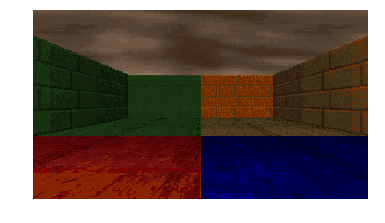

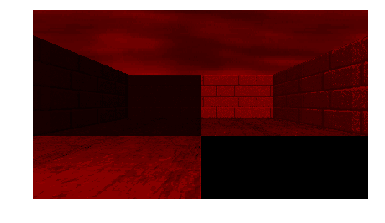

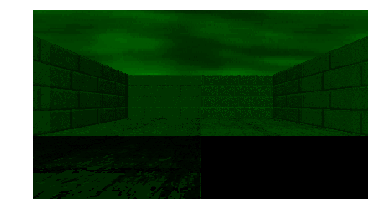

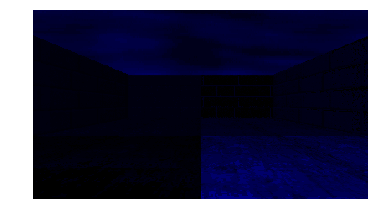

In [39]:
# Full color
fig, axes = plt.subplots()
img = axes.imshow(np.transpose(screen, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen.png", bbox_inches='tight')

# Red channel
fig, axes = plt.subplots()
screen_red = copy.copy(screen)
screen_red[1:, :, :] = 0
img = axes.imshow(np.transpose(screen_red, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_red.png", bbox_inches='tight')

# Green channel
fig, axes = plt.subplots()
screen_green = copy.copy(screen)
screen_green[0::2, :, :] = 0
img = axes.imshow(np.transpose(screen_green, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_green.png", bbox_inches='tight')

# Blue channel
fig, axes = plt.subplots()
screen_blue = copy.copy(screen)
screen_blue[:-1, :, :] = 0
img = axes.imshow(np.transpose(screen_blue, [1, 2, 0]))
ax = img.axes.axis('off')
plt.savefig(results_dir + "screen_blue.png", bbox_inches='tight')

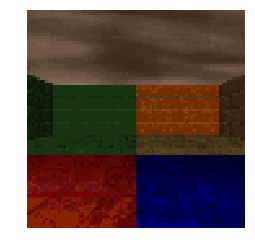

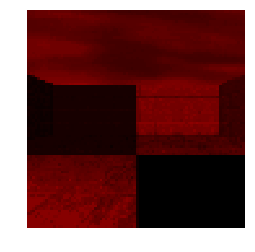

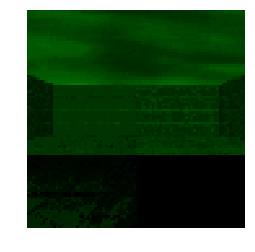

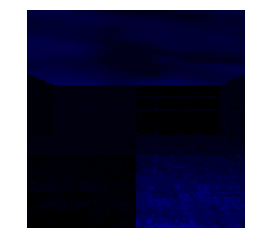

In [40]:
fig, axes = plt.subplots()
img = axes.imshow(state)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state.png", bbox_inches='tight')

# Red channel
fig, axes = plt.subplots()
state_red = copy.copy(state)
state_red[:, :, 1:] = 0
img = axes.imshow(state_red)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_red.png", bbox_inches='tight')

# Green channel
fig, axes = plt.subplots()
state_green = copy.copy(state)
state_green[:, :, 0::2] = 0
img = axes.imshow(state_green)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_green.png", bbox_inches='tight')

# Blue channel
fig, axes = plt.subplots()
state_blue = copy.copy(state)
state_blue[:, :, :-1] = 0
img = axes.imshow(state_blue)
ax = img.axes.axis('off')
plt.savefig(results_dir + "state_blue.png", bbox_inches='tight')

In [24]:
game.close()
plt.close('all')